<a href="https://colab.research.google.com/github/noname1711/computer_vision/blob/main/data_preprocessing_detect_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import các thư viện cần thiết
import numpy as np
import cv2
import pandas as pd
import os
import pickle     #giúp lưu data và tải data lên
from google.colab.patches import cv2_imshow
from google.colab import drive

In [2]:
#kết nối google colab
drive.mount('/content/drive')
path = '/content/drive/MyDrive/data_preprocessing_detect_face'
#hiển thị tất cả thư mục và file
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['models', 'faces']

In [3]:
# lấy model
faceDetectionModel = '/content/drive/MyDrive/data_preprocessing_detect_face/models/res10_300x300_ssd_iter_140000_fp16.caffemodel'
#mô tả kiến trúc
faceDetectionProto = '/content/drive/MyDrive/data_preprocessing_detect_face/models/deploy.prototxt'
#mô hình mô tả khuôn mặt
faceDescriptor ='/content/drive/MyDrive/data_preprocessing_detect_face/models/openface.nn4.small2.v1.t7'
#sử dụng openCV DNN đọc mô hình nhận diện khuôn mặt
detectorModel = cv2.dnn.readNetFromCaffe(faceDetectionProto, faceDetectionModel)
# đọc mộ hình mô tả khuôn mặt từ file Torch
descriptorModel = cv2.dnn.readNetFromTorch(faceDescriptor)

In [4]:
# danh sách hình ảnh chuẩn bị
faces = '/content/drive/MyDrive/data_preprocessing_detect_face/faces'
os.listdir(faces)

['elonMusk', 'another']

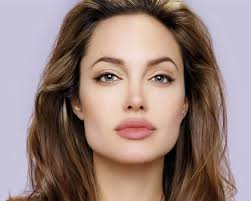

In [5]:
#hiển thị một hình ảnh
imgFace = '/content/drive/MyDrive/data_preprocessing_detect_face/faces/another/mat.jpg'
img = cv2.imread(imgFace)
cv2_imshow(img)

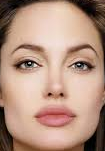

[[ 0.06716856  0.02709451 -0.01277567  0.08753122  0.02010745  0.11487907
   0.06009097  0.03187539  0.08612037 -0.0453944   0.09314007  0.0145114
   0.1134486  -0.14243905  0.03565479  0.01105776 -0.06026079  0.06386509
  -0.20855297  0.15119259  0.10962836 -0.08983757  0.09131835  0.17785841
  -0.03602238 -0.22881328 -0.1342518  -0.18355453 -0.08631979  0.05882866
   0.09454385  0.03409622  0.00326082  0.16454123 -0.05534491  0.05473324
   0.03829914  0.01892563 -0.12849033  0.03592128  0.0325942  -0.10444322
  -0.01504034  0.01277154 -0.07066809 -0.16986191  0.06526779  0.0319167
   0.00727601  0.20852736  0.04266325 -0.20222759 -0.10179107  0.0290136
   0.02454344  0.04873663 -0.0666828  -0.00150048  0.06023469 -0.00556609
  -0.11097603 -0.00267957 -0.00639098 -0.21344294  0.01862464 -0.1113644
   0.03742246 -0.09858439 -0.1486196   0.00498347 -0.04193355  0.05465432
  -0.03304311  0.03854643 -0.0085852  -0.04541293  0.05878626  0.08003964
  -0.02223836  0.0821987  -0.02958927 -0.0

In [6]:
#trích xuất đặc trưng cho 1 ảnh
path = '/content/drive/MyDrive/data_preprocessing_detect_face/faces/another/mat.jpg'
img1 = cv2.imread(imgFace)
#copy cái ảnh
image = img1.copy()
#lấy chiều cao và chiều rộng ảnh
h, w = image.shape[:2]
# chuẩn bị dữ liệu đầu vào cho mô hình nhận diện khuôn mặt
imgBlob = cv2.dnn.blobFromImage(image, 1,(300,300), (104,177,123), swapRB = False, crop = False)
# thiết lập đầu vào cho mô hình
detectorModel.setInput(imgBlob)
# thực hiện việc nhận diện khuôn mặt
detections = detectorModel.forward()
# kiểm tra xem có khuôn mặt nào hay không
if (len(detections)> 0):
  #chọn khuôn mặt có độ tin cậy cao nhất
  i = np.argmax(detections[0,0 ,:, 2])    #giá trị thứ 2 trong 7 giá trị cuối cùng là confidence(độ tin cậy)
  confidence = detections[0,0, i,2]
  # kiểm tra xem độ tin cậy có lớn hơn 0.9 không (0.5 là được nhưng để chính xác hơn thì lấy 0.9)
  if (confidence > 0.9):
    #tính toán hộp bao quanh khuôn mặt
    box = detections[0,0, i, 3:7] * np.array([w, h, w, h])
    (startX , startY, endX, endY) = box.astype('int')
    #trích xuất vùng ảnh chứa khuôn mặt ra
    roi = image[startY: endY, startX: endX]
    cv2_imshow(roi)
    #chuẩn bị dữ liệu đầu vào cho mô hình trích xuất đặc trưng
    faceBlob = cv2.dnn.blobFromImage(roi, 1/255, (96,96), (0,0,0), swapRB = True, crop = True)
    #thiết lập đầu vào cho mô hình
    descriptorModel.setInput(faceBlob)
    #thực hiện việc trích xuất đặc trưng
    vectors = descriptorModel.forward()
    #in vectors
    print(vectors)
    # tất nhiên, thực tế sẽ lấy số liệu đã trích xuất để so sánh với csdl có sẵn -> nhận diện
    # vấn đề là nếu người đó có nhiều ảnh -> duyệt tất cả các ảnh đó -> tính trung bình vectors -> số liệu sát nhất có thể



In [7]:
# Tạo ra một functions để áp dụng cho nhiều ảnh
def myDetect(image_path):
  # Trích xuất đặc trưng cho một ảnh
  img1 = cv2.imread(image_path)

  # Copy cái ảnh
  image = img1.copy()

  # Lấy chiều cao và chiều rộng của ảnh
  h, w = image.shape[:2]

  # Chuẩn bị dữ liệu đầu vào cho mô hình nhận diện khuôn mặt
  imgBlob = cv2.dnn.blobFromImage(image, 1, (300,300), (104, 177, 123), swapRB=False, crop=False)

  # Thiết lập đầu vào cho mô hình
  detectorModel.setInput(imgBlob)

  # Thực hiện việc nhận diện khuôn mặt
  detections = detectorModel.forward()

  # Kiểm tra xem có khuôn mặt nào hay không?
  if (len(detections)>0):
    # Chọn khuôn mặt có độ tin cậy cao nhất (confidence) cao nhất
    i = np.argmax(detections[0, 0, :, 2]) # Giá trị thứ 2 trong 7 giá trị cuối cùng => confidence
    confidence = detections[0, 0, i, 2]

    # Kiểm tra độ tin cậy có lớn hơn 0.5
    if (confidence>0.5):
        # Tính toán hộp bao quanh khuôn mặt
        box = detections[0, 0, i, 3:7]* np.array([w, h, w, h])
        (startX, startY, endX, endY) =box.astype('int')

        # Trích xuất vùng ảnh chứa khuôn mặt ra
        roi = image[startY:endY, startX:endX]
        # cv2_imshow(roi)

        # Chuẩn bị dữ liệu đầu vào cho mô hình trích xuất đặc trưng
        faceBlob = cv2.dnn.blobFromImage(roi, 1/255, (96,96), (0,0,0), swapRB=True, crop=True)

        # Thiết lập đầu vào cho mô hình
        descriptorModel.setInput(faceBlob)

        # Thực hiện việc trích xuất đặc trưng
        vectors = descriptorModel.forward()

        # Print vectors
        return vectors


In [8]:
# Apply for all images

# Khởi tạo một dictionary
data = dict(data=[], label=[])

myDir = '/content/drive/MyDrive/data_preprocessing_detect_face/faces'
folders = os.listdir(myDir)

# Duyệt qua từng thư mục
for folder in folders:
  path = myDir + "/"+folder
  print(path)

  files =  os.listdir(path)
  for fileName in files:
    try:
        # Gọi hàm trích xuất đặc trưng
        vector = myDetect(path+'/'+fileName)

        # Kiểm tra việc trích xuất đặc trưng thành công:
        if vector is not None:
          #Thêm vector đặc trưng vào trong từ điển với nhãn là tên của thư mục
          data['data'].append(vector)
          data['label'].append(folder)
          print('Trích xuất đặc trưng thành công')
    except:
      # Bỏ qua nếu gặp lỗi
      pass

/content/drive/MyDrive/data_preprocessing_detect_face/faces/elonMusk
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
/content/drive/MyDrive/data_preprocessing_detect_face/faces/another
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công


In [9]:
data.keys()

dict_keys(['data', 'label'])

In [10]:
# Tạo một series từ dictionary
labelSeries = pd.Series(data['label'])
# Đếm số lần xuất hiện của mỗi nhãn
labelCounts = labelSeries.value_counts()
print(labelCounts)

another     3
elonMusk    2
Name: count, dtype: int64


In [11]:
# lưu trữ file vì việc chạy sẽ tốn time
# Save data -> file
print('/content/drive/MyDrive/test_cv/project/')
fileName = '/content/drive/MyDrive/data_preprocessing_detect_face/data_face_features.pickle'
pickle.dump(data, open(fileName, mode='wb'))

/content/drive/MyDrive/test_cv/project/
